In [163]:
import os, glob, shutil
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import skimage
from skimage.io import imread , imsave, imread_collection 

from sklearn.metrics import accuracy_score , classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.applications import mobilenet
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import BatchNormalization

In [2]:
# total patients number
img_path ='data_origin/*/'
patient_list = list(glob.glob(img_path))
print(f'Number of the patient: {len(patient_list)}')

Number of the patient: 279


In [3]:
patient_list[0]

'data_origin/12749/'

In [4]:
# total image numbers
sum = 0
for i in range(len(patient_list)):
    sum += len(glob.glob(patient_list[i]+'/*/*'))
print(sum)

277524


In [5]:
img_list=[glob.glob(patient_list[i]+'/*/*') for i in range(len(patient_list))]

In [6]:
len(img_list)

279

In [7]:
img_list[0][0]

'data_origin/12749/0/12749_idx5_x1901_y701_class0.png'

In [8]:
t = img_list[0][0].split('/')
t

['data_origin', '12749', '0', '12749_idx5_x1901_y701_class0.png']

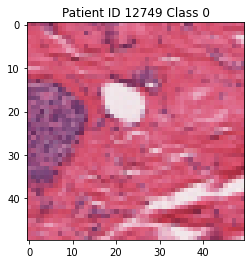

In [16]:
img_sample = imread(img_list[0][0])
plt.title(f'Patient ID {t[1]} Class {t[2]}')
plt.imshow(img_sample)

In [17]:
imgname = img_list[0][0].split('/')[3]
imgname

'12749_idx5_x1901_y701_class0.png'

In [19]:
img_sample

array([[[189,  70, 104],
        [167,  61,  95],
        [183,  75, 111],
        ...,
        [215,  88, 121],
        [220,  99, 134],
        [209,  89, 124]],

       [[211,  79, 112],
        [211,  84, 116],
        [212,  87, 120],
        ...,
        [199,  69,  96],
        [197,  68,  97],
        [199,  70, 101]],

       [[215,  82, 111],
        [217,  83, 112],
        [217,  87, 116],
        ...,
        [214, 105, 136],
        [211, 121, 147],
        [215, 101, 131]],

       ...,

       [[213,  84, 113],
        [214,  91, 119],
        [205,  80, 112],
        ...,
        [193,  56,  70],
        [188,  54,  75],
        [185,  55,  83]],

       [[208,  91, 122],
        [206,  93, 133],
        [199, 103, 145],
        ...,
        [214,  82, 111],
        [212,  84, 118],
        [223, 109, 138]],

       [[215,  90, 126],
        [213,  87, 121],
        [205,  84, 112],
        ...,
        [219, 127, 155],
        [226, 154, 176],
        [240, 200, 213]]

In [98]:
img_sample.shape

(50, 50, 3)

In [20]:
img_list[0][:5]

['data_origin/12749/0/12749_idx5_x1901_y701_class0.png',
 'data_origin/12749/0/12749_idx5_x1551_y1301_class0.png',
 'data_origin/12749/0/12749_idx5_x1151_y1301_class0.png',
 'data_origin/12749/0/12749_idx5_x2351_y351_class0.png',
 'data_origin/12749/0/12749_idx5_x3301_y2451_class0.png']

In [21]:
for patient in img_list[:100]:
    for each_img in patient:
        img = imread(each_img)
        p = each_img.split('/')
        if p[2] == '0':
            imsave(os.path.join('0', p[3]), img)
        else:
            imsave(os.path.join('1', p[3]), img)

<ipython-input-21-4dd4b3a4e250>:6: UserWarning: 0/16550_idx5_x2951_y2201_class0.png is a low contrast image
  imsave(os.path.join('0', p[3]), img)
<ipython-input-21-4dd4b3a4e250>:6: UserWarning: 0/16550_idx5_x3001_y2251_class0.png is a low contrast image
  imsave(os.path.join('0', p[3]), img)
<ipython-input-21-4dd4b3a4e250>:6: UserWarning: 0/16550_idx5_x2951_y2251_class0.png is a low contrast image
  imsave(os.path.join('0', p[3]), img)
<ipython-input-21-4dd4b3a4e250>:6: UserWarning: 0/16550_idx5_x1851_y201_class0.png is a low contrast image
  imsave(os.path.join('0', p[3]), img)
<ipython-input-21-4dd4b3a4e250>:6: UserWarning: 0/16550_idx5_x2901_y2251_class0.png is a low contrast image
  imsave(os.path.join('0', p[3]), img)
<ipython-input-21-4dd4b3a4e250>:6: UserWarning: 0/13400_idx5_x651_y2601_class0.png is a low contrast image
  imsave(os.path.join('0', p[3]), img)
<ipython-input-21-4dd4b3a4e250>:6: UserWarning: 0/13400_idx5_x901_y2601_class0.png is a low contrast image
  imsave(os.p

In [22]:
# total image number for class 0 and 1
nums_0 = len(list(glob.glob('0/*')))
nums_1 = len(list(glob.glob('1/*')))
nums_0, nums_1

(75294, 31168)

In [23]:
30735 / (75552+30735)

0.2891698890739225

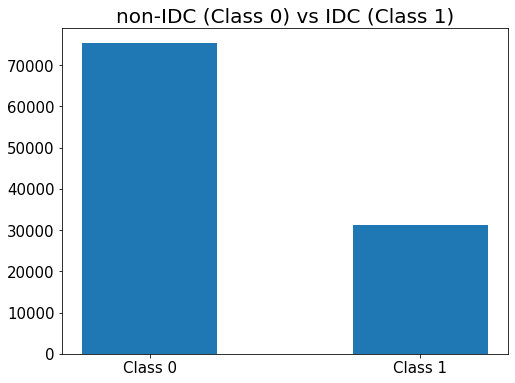

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(['Class 0', 'Class 1'], [nums_0, nums_1], width=0.5)
ax.set_title('non-IDC (Class 0) vs IDC (Class 1)', fontsize=20)
ax.tick_params(labelsize=15)

Because data classified as IDC (class 1) is approximately 28.9%, this is an unbalanced dataset. However, I have so many images that it's hard to undersample any class. So I will not do anything special to address this imbalance. But I will definately choose F1 score as one of the metrics. 

Now show some examples of Cancerous Patches:

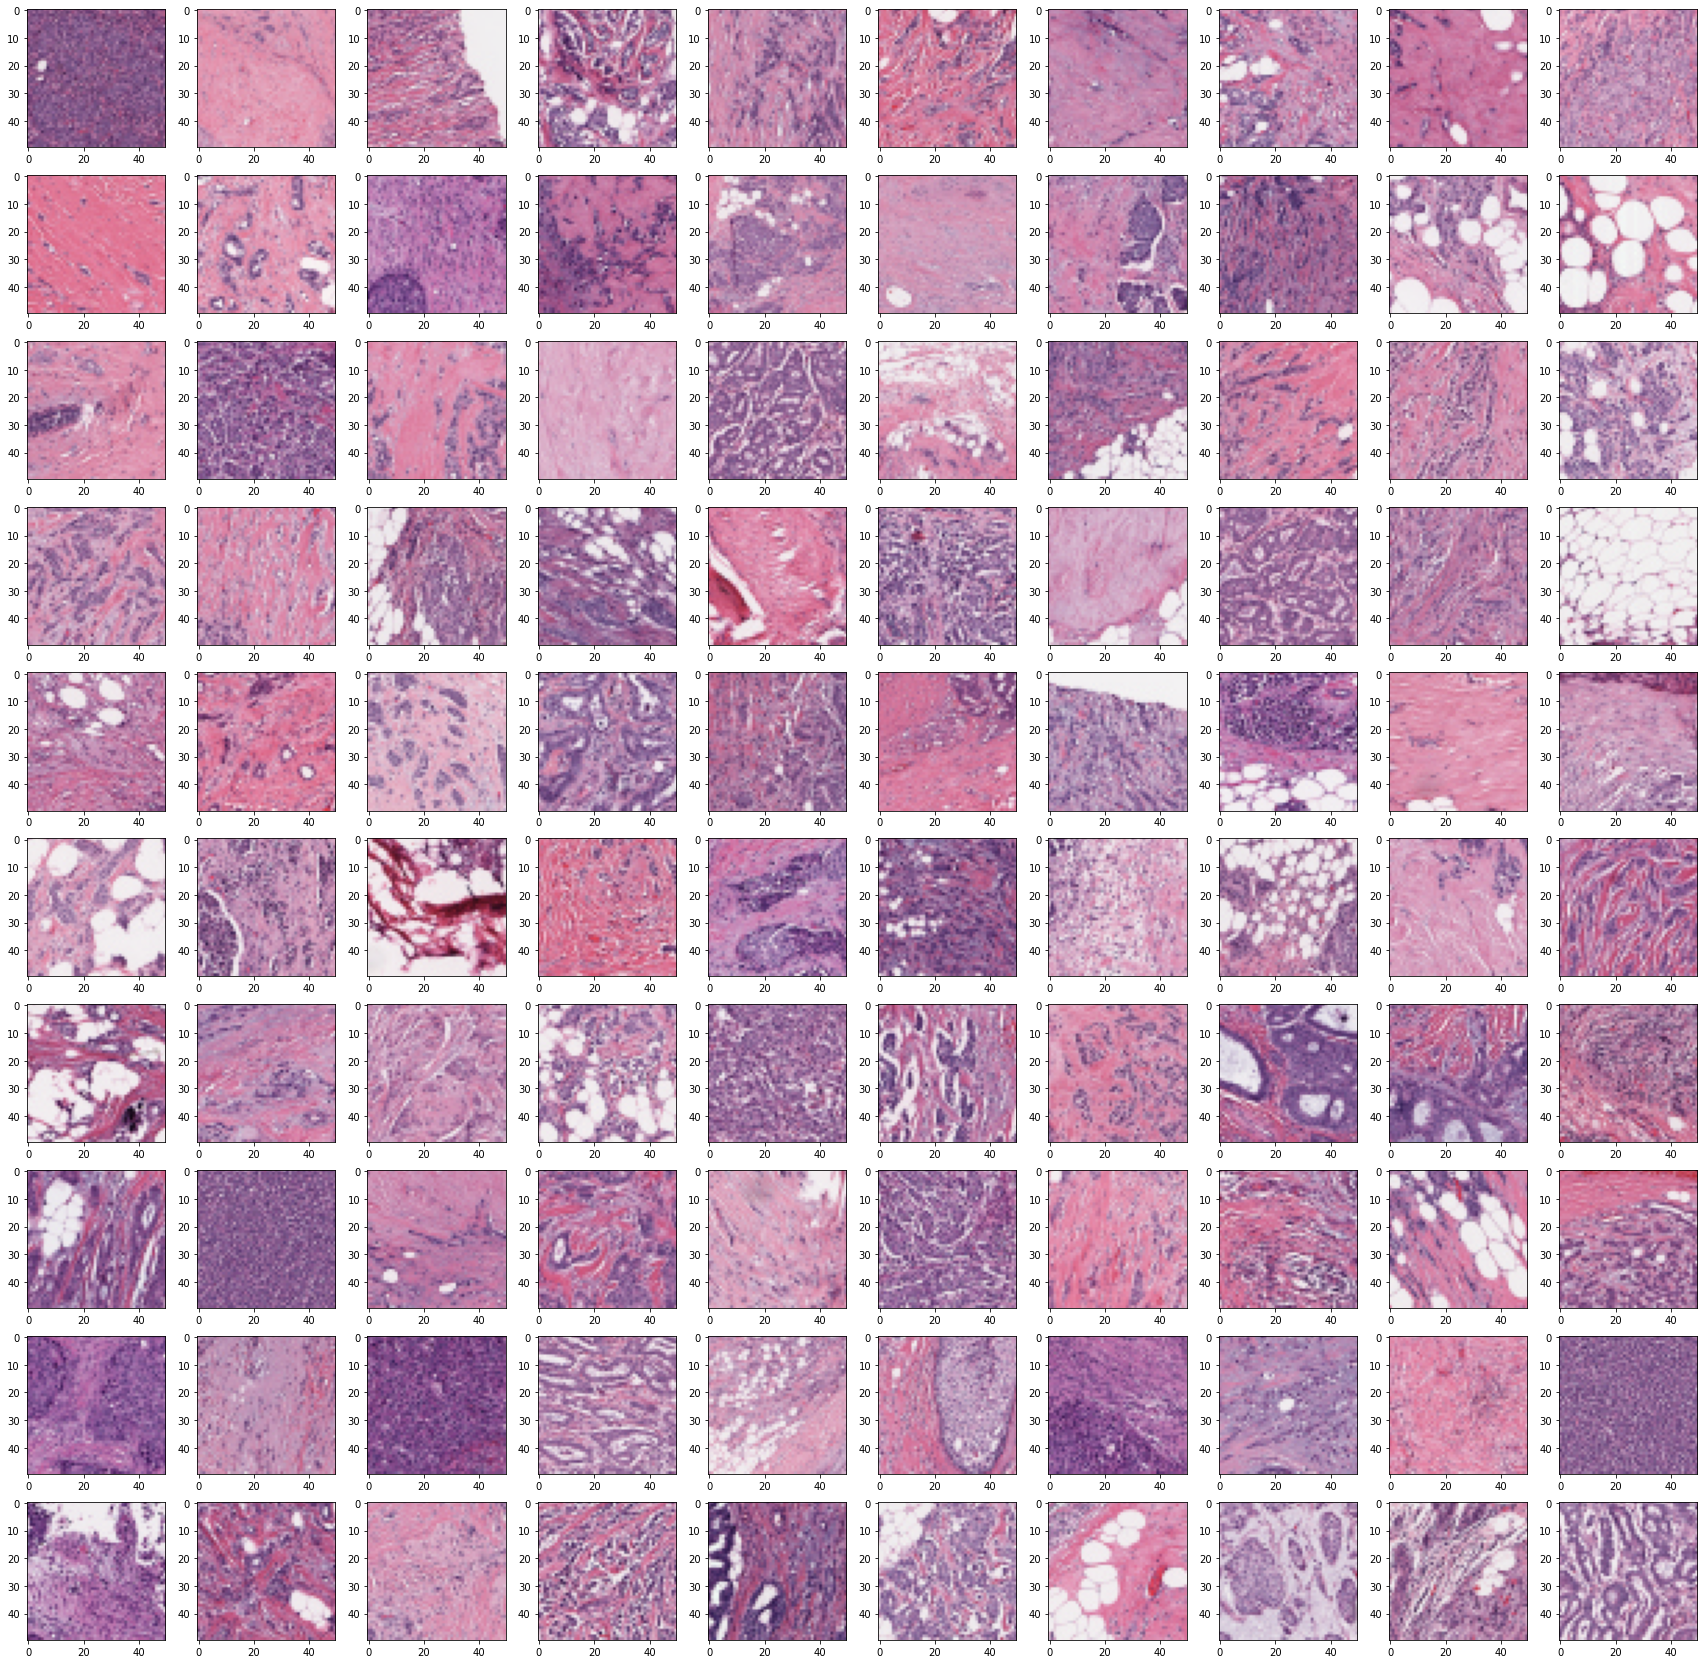

In [25]:
cls1img_list=os.listdir('1')

fig,axs = plt.subplots(10,10,figsize = (30,30))

for i in range(100):
    img = imread('1/'+cls1img_list[i])
    axs.flatten()[i].imshow(img)


Now show some examples of Non-Cancerous Patches:

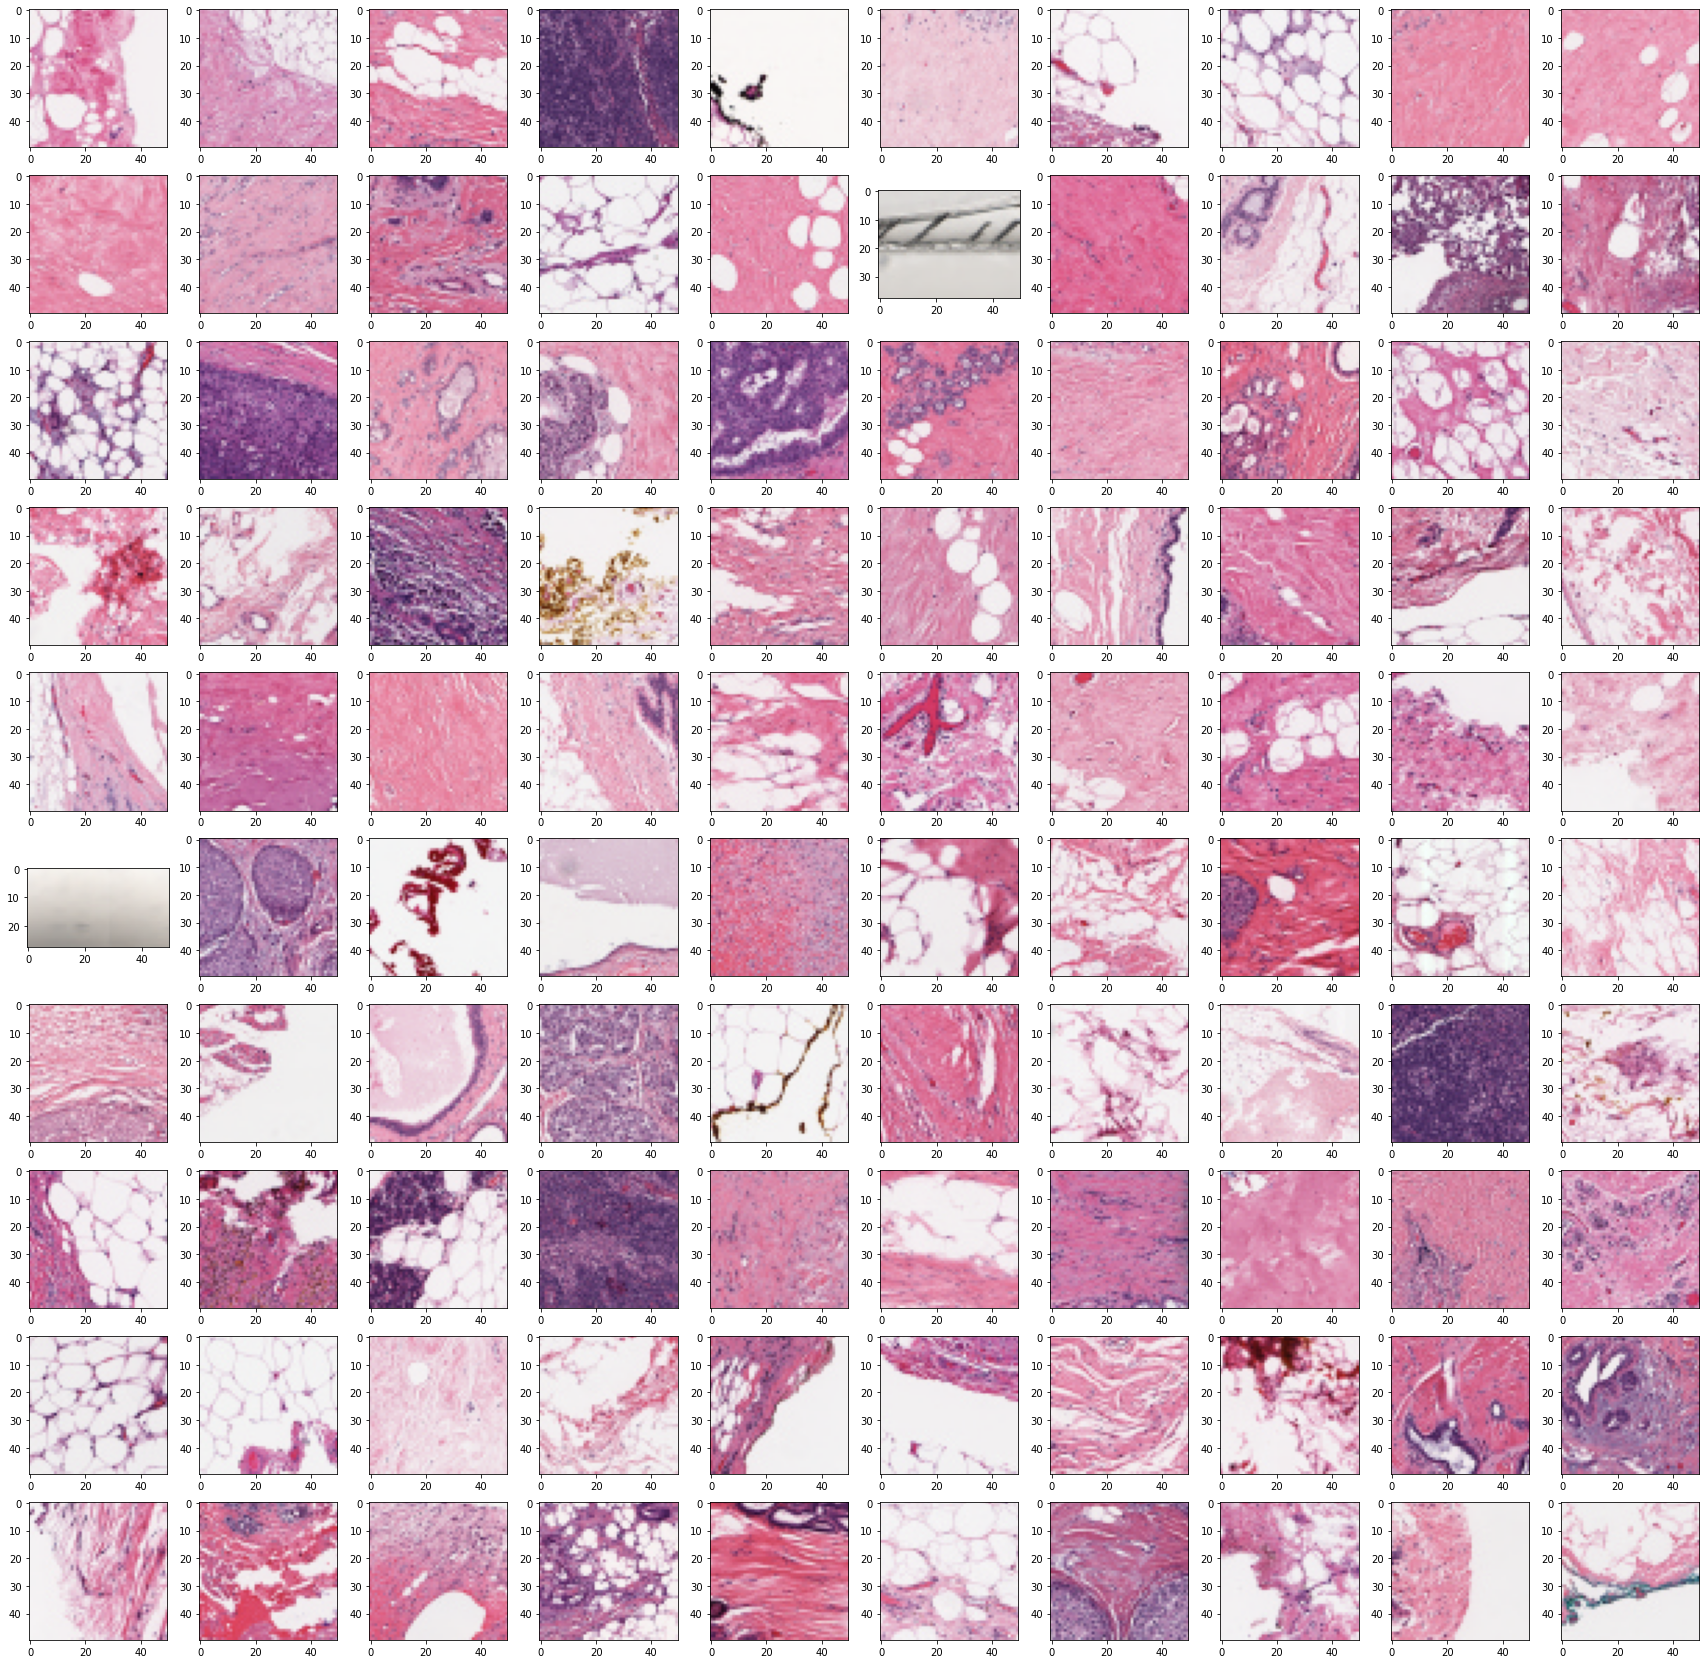

In [26]:
cls0img_list=os.listdir('0')

fig,axs = plt.subplots(10,10,figsize = (30,30))

for i in range(100):
    img = imread('0/'+cls0img_list[i])
    axs.flatten()[i].imshow(img)

Now splitting data into Train, Validate, Test folders:

In [27]:
# # Creating Train / Val / Test folders
root_dir = 'data'
Cls1 = '/1'
Cls0 = '/0'

os.makedirs(root_dir +'/train' + Cls1)
os.makedirs(root_dir +'/train' + Cls0)
os.makedirs(root_dir +'/val' + Cls1)
os.makedirs(root_dir +'/val' + Cls0)
os.makedirs(root_dir +'/test' + Cls1)
os.makedirs(root_dir +'/test' + Cls0)


In [28]:
# Creating partitions of the data after shuffeling
# First split Class 1 images

Cls1Names = os.listdir(Cls1[1])
np.random.shuffle(Cls1Names)
train_Names, val_Names, test_Names = np.split(np.array(Cls1Names),
                                                          [int(len(Cls1Names)*0.6), int(len(Cls1Names)*0.8)])

train_Names = [name for name in train_Names.tolist()]
val_Names = [name for name in val_Names.tolist()]
test_Names = [name for name in test_Names.tolist()]

print('Total images: ', len(Cls1Names))
print('Training: ', len(train_Names))
print('Validation: ', len(val_Names))
print('Testing: ', len(test_Names))


Total images:  31168
Training:  18700
Validation:  6234
Testing:  6234


In [29]:
# Copy-pasting images
for name in train_Names:
    shutil.copy(Cls1[1]+'/'+name, "data/train"+Cls1)

for name in val_Names:
    shutil.copy(Cls1[1]+'/'+name, "data/val"+Cls1)

for name in test_Names:
    shutil.copy(Cls1[1]+'/'+name, "data/test"+Cls1)


In [30]:
# Then split Class 0 images
Cls0Names = os.listdir(Cls0[1])
np.random.shuffle(Cls0Names)
train_Names, val_Names, test_Names = np.split(np.array(Cls0Names),
                                                          [int(len(Cls0Names)*0.6), int(len(Cls0Names)*0.8)])

train_Names = [name for name in train_Names.tolist()]
val_Names = [name for name in val_Names.tolist()]
test_Names = [name for name in test_Names.tolist()]

print('Total images: ', len(Cls0Names))
print('Training: ', len(train_Names))
print('Validation: ', len(val_Names))
print('Testing: ', len(test_Names))


Total images:  75294
Training:  45176
Validation:  15059
Testing:  15059


In [31]:
# Copy-pasting images
for name in train_Names:
    shutil.copy(Cls0[1]+'/'+name, "data/train"+Cls0)

for name in val_Names:
    shutil.copy(Cls0[1]+'/'+name, "data/val"+Cls0)

for name in test_Names:
    shutil.copy(Cls0[1]+'/'+name, "data/test"+Cls0)

In [35]:
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(50, 50, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy', 'AUC', 'Precision', 'Recall'])
    
    return model

model = build_model()


In [32]:
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip = True,
    width_shift_range = 0.2,
    height_shift_range = 0.2) 

train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(50, 50),  # all images will be resized to 150x150
        batch_size=batch_size,
        seed=1,
        class_mode='binary')

Found 63876 images belonging to 2 classes.


In [41]:
# Store the data in X_train, y_train variables by iterating over the batches
train_generator.reset()
X_train, y_train = next(train_generator)
for i in tqdm(range(len(train_generator)-1)): #1st batch is already fetched before the for loop
    img, label = next(train_generator)
    X_train = np.append(X_train, img, axis=0 )
    y_train = np.append(y_train, label, axis=0)
print(X_train.shape, y_train.shape)

100%|██████████| 1996/1996 [19:24<00:00,  1.71it/s]

(63876, 50, 50, 3) (63876,)


In [33]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        'data/val',
        target_size=(50, 50),
        batch_size=batch_size,
        seed=1,
        class_mode='binary')
print(len(validation_generator))


Found 21293 images belonging to 2 classes.
666


In [42]:
# Store the data in X_val, y_val variables by iterating over the batches
validation_generator.reset()
X_val, y_val = next(validation_generator)
for i in tqdm(range(len(validation_generator)-1)): #1st batch is already fetched before the for loop
    img, label = next(train_generator)
    X_val = np.append(X_val, img, axis=0 )
    y_val = np.append(y_val, label, axis=0)
print(X_val.shape, y_val.shape)

100%|██████████| 665/665 [05:26<00:00,  2.04it/s]

(21312, 50, 50, 3) (21312,)


In [36]:
history = model.fit_generator(
    train_generator,
    #steps_per_epoch=180 // batch_size,
    epochs=30,
    validation_data=validation_generator)
    #validation_steps=20 // batch_size)

# model.save_weights('first_try.h5')


/home/jie/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
1997/1997 [==============================] - 185s 91ms/step - loss: 0.4594 - accuracy: 0.7883 - auc: 0.8126 - precision: 0.6717 - recall: 0.4797 - val_loss: 0.3868 - val_accuracy: 0.8238 - val_auc: 0.8945 - val_precision: 0.6688 - val_recall: 0.7889
Epoch 2/30
1997/1997 [==============================] - 178s 89ms/step - loss: 0.3927 - accuracy: 0.8286 - auc: 0.8750 - precision: 0.7369 - recall: 0.6480 - val_loss: 0.3679 - val_accuracy: 0.8422 - val_auc: 0.8949 - val_precision: 0.7484 - val_recall: 0.6944
Epoch 3/30
1997/1997 [==============================] - 175s 88ms/step - loss: 0.3762 - accuracy: 0.8372 - auc: 0.8860 - precision: 0.7529 - recall: 0.6571 - val_loss: 0.3572 - val_accuracy: 0.8481 - val_auc: 0.9075 - val_precision: 0.8309 - val_recall: 0.6039
Epoch 4/30
1997/1997 [==============================] - 181s 91ms/step - loss: 0.3704 - accuracy: 0.8412 - auc: 0.8905 - precision: 0.7586 - recall: 0.6696 - val_loss: 0.3453 - val_accuracy: 0.8522 - val_auc: 0.9085 -

In [47]:
score = model.evaluate(validation_generator, verbose=0)
print('Test score:', score[0])
print('Test accuracy: ', score[1])
print('Test AUC: ', score[2])
print('Test Precision: ', score[3])
print('Test Recall: ', score[4])

Test score: 0.2926903963088989
Test accuracy:  0.8754520416259766
Test AUC:  0.9342929124832153
Test Precision:  0.792264997959137
Test Recall:  0.7787936925888062


use image size 30x30 and 50x50, I got better accuracy scores and AUC, and speed is not very different, so I will go with 50x50.

In [48]:
model.save('base_model_complete.h5')

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          1

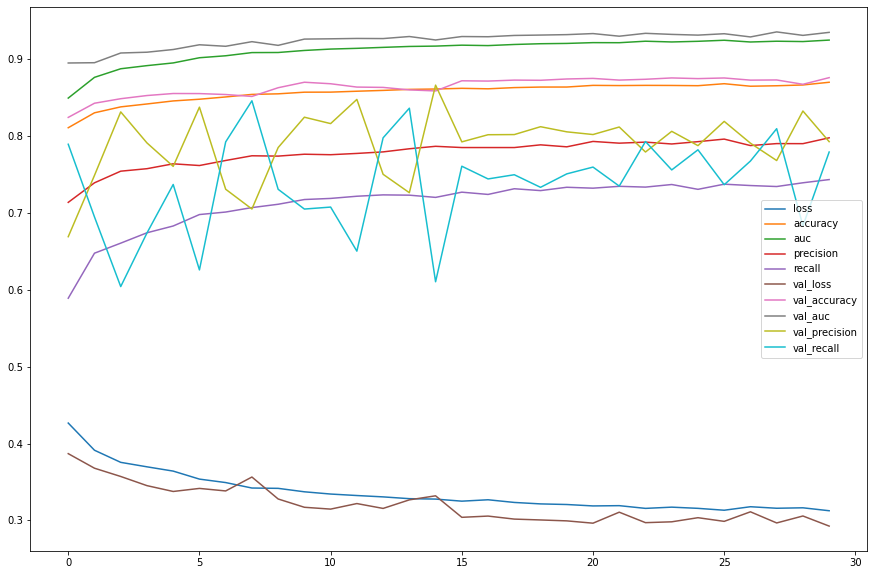

In [39]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(15,10))
[ax.plot(history.history[i], label=i) for i in history.history.keys()]
plt.legend()

In [45]:
from sklearn.metrics import classification_report , confusion_matrix
y_pred = model.predict(X_val)
y_pred

/home/jie/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]], dtype=int32)

In [52]:
y_pred.shape

(21312, 1)

In [46]:
target_name = ['benign','malignant']
classification_report(y_true=y_val , y_pred=y_pred, output_dict=True , target_names= target_name)

{'benign': {'precision': 0.8981723237597912,
  'recall': 0.9161118508655126,
  'f1-score': 0.9070533948582729,
  'support': 15020},
 'malignant': {'precision': 0.7897196261682243,
  'recall': 0.7520661157024794,
  'f1-score': 0.7704330836860959,
  'support': 6292},
 'accuracy': 0.8676801801801802,
 'macro avg': {'precision': 0.8439459749640077,
  'recall': 0.8340889832839959,
  'f1-score': 0.8387432392721843,
  'support': 21312},
 'weighted avg': {'precision': 0.8661535374775962,
  'recall': 0.8676801801801802,
  'f1-score': 0.8667186070441147,
  'support': 21312}}

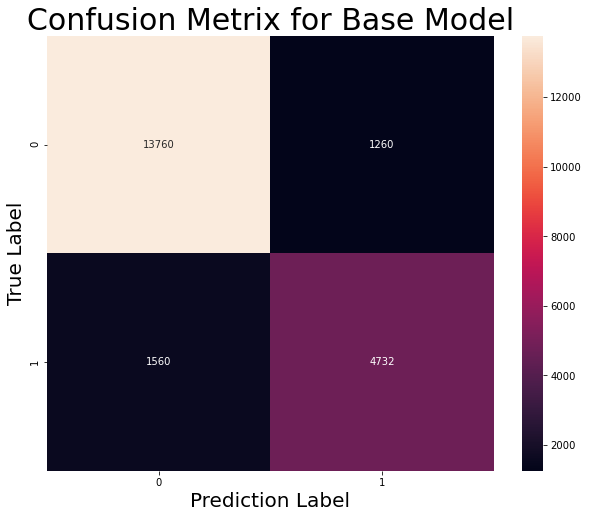

In [144]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(confusion_matrix(y_true=y_val, y_pred=y_pred),annot=True , fmt='2d')
ax.set_title('Confusion Metrix for Base Model',fontsize=30)
ax.set_xlabel('Prediction Label',fontsize=20)
ax.set_ylabel('True Label',fontsize=20)
plt.savefig('base_model_confusion.jpg')

TP = 4732, FP = 1260, TN = 13760, FN = 1560

Recall = TPR = TP / (TP+FN) = 4732 / (4732+1560)    also know as Sensitivity

Precision = = TP / (TP+FP) = 4732 / (4732+1260)     also known as positive prediction value

TNR = TN / (TN+FP) = 13760 / (13760+1260)     also known as Specificity


In [53]:
recall = 4732 / (4732+1560)
recall

0.7520661157024794

In [54]:
precision = 4732 / (4732+1260)
precision

0.7897196261682243

In [55]:
specificity = 13760 / (13760+1260) 
specificity

0.9161118508655126

In [63]:
second_model = load_model("base_model.h5")

earlystp = EarlyStopping(monitor='loss', patience=3)
filepath = 'second_model.h5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history_second = second_model.fit(
    train_generator,
    validation_data=validation_generator,
    batch_size=batch_size, epochs=30,
    callbacks=callbacks_list)

Epoch 1/30
1997/1997 [==============================] - 257s 128ms/step - loss: 0.3125 - accuracy: 0.8676 - auc: 0.9244 - precision: 0.7934 - recall: 0.7405 - val_loss: 0.3072 - val_accuracy: 0.8697 - val_auc: 0.9292 - val_precision: 0.8258 - val_recall: 0.7032

Epoch 00001: loss improved from inf to 0.31248, saving model to second_model.h5
Epoch 2/30
1997/1997 [==============================] - 176s 88ms/step - loss: 0.3136 - accuracy: 0.8663 - auc: 0.9239 - precision: 0.7917 - recall: 0.7373 - val_loss: 0.3011 - val_accuracy: 0.8721 - val_auc: 0.9314 - val_precision: 0.7772 - val_recall: 0.7895

Epoch 00002: loss did not improve from 0.31248
Epoch 3/30
1997/1997 [==============================] - 171s 86ms/step - loss: 0.3139 - accuracy: 0.8655 - auc: 0.9239 - precision: 0.7902 - recall: 0.7361 - val_loss: 0.2940 - val_accuracy: 0.8772 - val_auc: 0.9353 - val_precision: 0.8009 - val_recall: 0.7725

Epoch 00003: loss did not improve from 0.31248
Epoch 4/30
1997/1997 [=================

1997/1997 [==============================] - 174s 87ms/step - loss: 0.3043 - accuracy: 0.8716 - auc: 0.9283 - precision: 0.8023 - recall: 0.7449 - val_loss: 0.2937 - val_accuracy: 0.8732 - val_auc: 0.9351 - val_precision: 0.8235 - val_recall: 0.7217

Epoch 00026: loss did not improve from 0.30141
Epoch 27/30
1997/1997 [==============================] - 187s 93ms/step - loss: 0.3164 - accuracy: 0.8696 - auc: 0.9272 - precision: 0.8000 - recall: 0.7394 - val_loss: 0.2827 - val_accuracy: 0.8780 - val_auc: 0.9391 - val_precision: 0.8103 - val_recall: 0.7618

Epoch 00027: loss did not improve from 0.30141
Epoch 28/30
1997/1997 [==============================] - 183s 92ms/step - loss: 0.3008 - accuracy: 0.8732 - auc: 0.9298 - precision: 0.8061 - recall: 0.7466 - val_loss: 0.3023 - val_accuracy: 0.8712 - val_auc: 0.9309 - val_precision: 0.8168 - val_recall: 0.7218

Epoch 00028: loss improved from 0.30141 to 0.30079, saving model to second_model.h5
Epoch 29/30
1997/1997 [======================

In [64]:
score = second_model.evaluate(validation_generator, verbose=0)
print('Test score:', score[0])
print('Test accuracy: ', score[1])
print('Test AUC: ', score[2])
print('Test Precision: ', score[3])
print('Test Recall: ', score[4])

Test score: 0.3143039345741272
Test accuracy:  0.872587263584137
Test AUC:  0.9318781495094299
Test Precision:  0.843914806842804
Test Recall:  0.6929740309715271


comapring to the first mode:

Test score: 0.2926903963088989

Test accuracy:  0.8754520416259766

Test AUC:  0.9342929124832153

Test Precision:  0.792264997959137

Test Recall:  0.7787936925888062

The second model does not look better.

In [65]:
second_model.save('second_model_complete')

INFO:tensorflow:Assets written to: second_model_complete/assets


Notice that if I save to a string without .h5, then it will create a folder and put things in. If I save as string.h5, then it will put everything in a single h5 file. When I need to reload the model later, in the first case, I use load_model('string'), for the second case, I use load_model('string.h5') 

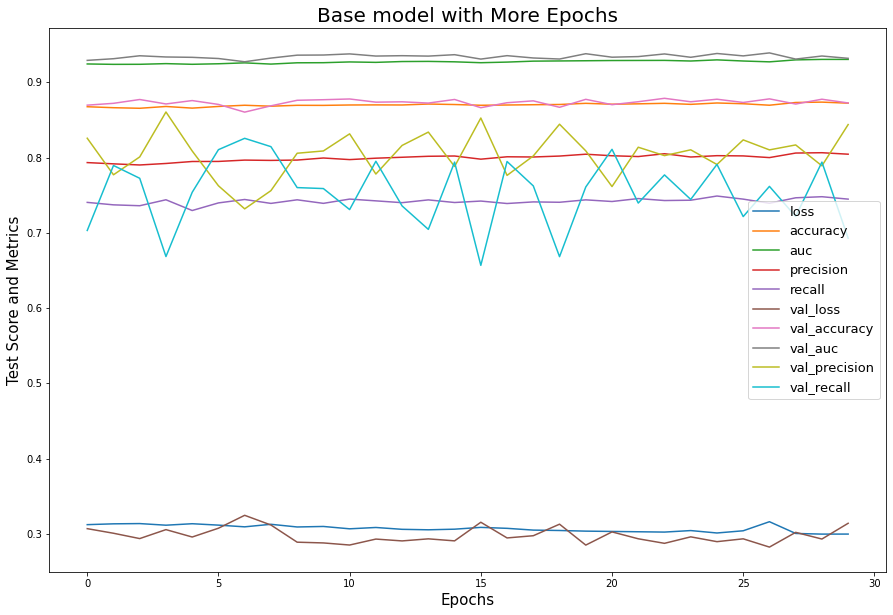

In [142]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(15,10))
[ax.plot(history.history[i], label=i) for i in history.history.keys()]
ax.set_xlabel('Epochs', fontsize=15)
ax.set_ylabel('Test Score and Metrics', fontsize=15)
ax.set_title('Base model with More Epochs', fontsize=20)
plt.legend(fontsize=13, loc='best')
plt.savefig('base_model_30more.jpg')

The learning is almost flat for all the epochs, so more epochs is not helping here. Need to tune other parameters.

This model is continued from the base model. If I am not changing anything in the base model, we only need to load the trained and saved base model, and continue to fit(). If we change anything in the compile stage, we only need to load model, then recompile the model, and continue to fit(). If we changed the model structure, like adding more layers, then we need to start from model building, and the parameters from previously trained model can not be used here. There is another way called model transfering to deal with this though.

In [67]:
second_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          1

If I load the second_model.h5 which was created by checkpoint, the model fitting will not continue from the last epoch of the second_model.fit. Only if I loadthe second_model_complete, then the fit() will continue from the last epoch of the second_model.fit. Anyway, I will addd more layers.

In [111]:
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(50, 50, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Conv2D(64, (3, 3))) # add one more CNN layers here
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))
    model.add(Dropout(0.1))
    
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
                          # this is necessary before going into conventional dense layer
    
    model.add(Dense(64)) # now start a conventional neural network
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    
    model.add(Dense(1))  #should be equal to the number of classes
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy', 'AUC', 'Precision', 'Recall'])
    
    return model

third_model = build_model()


In [112]:
third_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
activation_61 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
activation_62 (Activation)   (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 9, 9, 64)        

The total params is smaller now even I add one more Conv2D layer. Probably it is because of MaxPooling after each layer, which might reduce the number of parameters even if I add one more layer. This is not the right way to add one more layer. We should add one more Conv2D in front of the MaxPooling.

In [113]:
earlystp_third = EarlyStopping(monitor='loss', patience=3)
filepath = 'third_model.h5'
checkpoint_third = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list_third = [checkpoint_third]

history_third = third_model.fit(
    train_generator,
    validation_data=validation_generator,
    batch_size=batch_size, epochs=50,
    callbacks=callbacks_list_third)

Epoch 1/50
3993/3993 [==============================] - 409s 102ms/step - loss: 0.4809 - accuracy: 0.7763 - auc: 0.7886 - precision: 0.7000 - recall: 0.4104 - val_loss: 0.3829 - val_accuracy: 0.8288 - val_auc: 0.8840 - val_precision: 0.7380 - val_recall: 0.6436

Epoch 00001: loss did not improve from 0.29992
Epoch 2/50
3993/3993 [==============================] - 192s 48ms/step - loss: 0.3997 - accuracy: 0.8261 - auc: 0.8709 - precision: 0.7361 - recall: 0.6341 - val_loss: 0.3550 - val_accuracy: 0.8476 - val_auc: 0.9013 - val_precision: 0.7857 - val_recall: 0.6593

Epoch 00002: loss did not improve from 0.29992
Epoch 3/50
3993/3993 [==============================] - 193s 48ms/step - loss: 0.3853 - accuracy: 0.8343 - auc: 0.8803 - precision: 0.7515 - recall: 0.6485 - val_loss: 0.3937 - val_accuracy: 0.8291 - val_auc: 0.8943 - val_precision: 0.6870 - val_recall: 0.7648

Epoch 00003: loss did not improve from 0.29992
Epoch 4/50
3993/3993 [==============================] - 195s 49ms/step -

3993/3993 [==============================] - 179s 45ms/step - loss: 0.3281 - accuracy: 0.8608 - auc: 0.9165 - precision: 0.7886 - recall: 0.7190 - val_loss: 0.3238 - val_accuracy: 0.8566 - val_auc: 0.9258 - val_precision: 0.8452 - val_recall: 0.6245

Epoch 00027: loss did not improve from 0.29992
Epoch 28/50
3993/3993 [==============================] - 179s 45ms/step - loss: 0.3251 - accuracy: 0.8642 - auc: 0.9175 - precision: 0.7932 - recall: 0.7249 - val_loss: 0.3329 - val_accuracy: 0.8567 - val_auc: 0.9243 - val_precision: 0.8501 - val_recall: 0.6197

Epoch 00028: loss did not improve from 0.29992
Epoch 29/50
3993/3993 [==============================] - 178s 45ms/step - loss: 0.3288 - accuracy: 0.8587 - auc: 0.9154 - precision: 0.7800 - recall: 0.7164 - val_loss: 0.3250 - val_accuracy: 0.8542 - val_auc: 0.9260 - val_precision: 0.8505 - val_recall: 0.6089

Epoch 00029: loss did not improve from 0.29992
Epoch 30/50
3993/3993 [==============================] - 178s 45ms/step - loss: 0.

In [115]:
score = third_model.evaluate(validation_generator, verbose=0)
print('Test score:', score[0])
print('Test accuracy: ', score[1])
print('Test AUC: ', score[2])
print('Test Precision: ', score[3])
print('Test Recall: ', score[4])

Test score: 0.31248682737350464
Test accuracy:  0.8633823394775391
Test AUC:  0.9268062114715576
Test Precision:  0.8176953792572021
Test Recall:  0.6863971948623657


In [145]:
third_model.save('third_model_complete')

INFO:tensorflow:Assets written to: third_model_complete/assets


Adding one more CNN layer does not help here. And I cannot add more layers. It will raise error. The problem comes from the fact that I use MaxPooling for every layer. Then after fourth layes, it cannot MaxPooling any more, so it will raise error. This is probably not a right way to add more layers. Instead of adding more Cov2D+Activation+MaxPooling layers. what people more frequently do is: Cov2D+Cov2D+Activation+MaxPooling, Cov2D+Cov2D+Activation+MaxPooling, Cov2D+Cov2D+Activation+MaxPooling. Do it three times. 

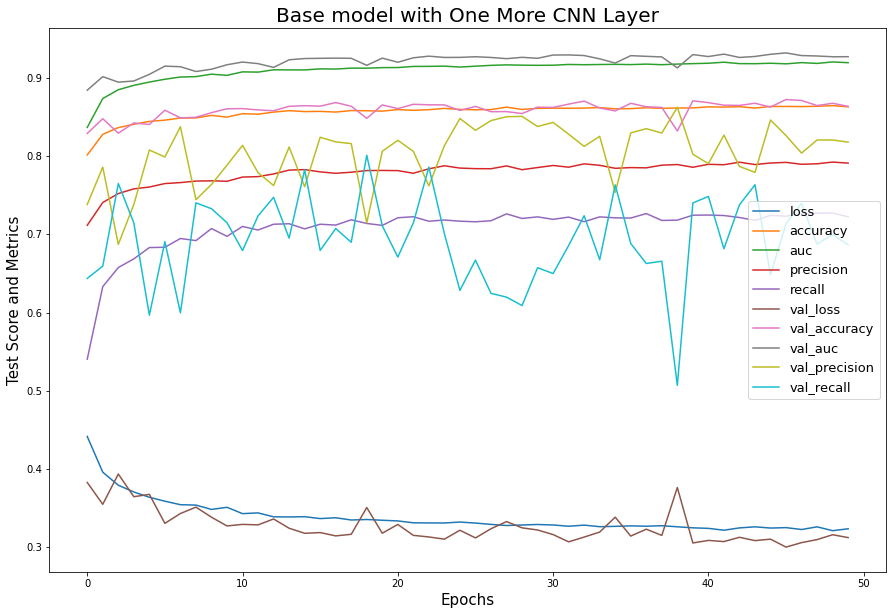

In [143]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(15,10))
[ax.plot(history_third.history[i], label=i) for i in history_third.history.keys()]
ax.set_xlabel('Epochs', fontsize=15)
ax.set_ylabel('Test Score and Metrics', fontsize=15)
ax.set_title('Base model with One More CNN Layer', fontsize=20)
plt.legend(fontsize=13, loc='best')
plt.savefig('one_more_cnn.jpg')


In [116]:
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(50, 50, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Conv2D(64, (3, 3))) # add one more CNN layers here
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))
    model.add(Dropout(0.1))
    
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
                          # this is necessary before going into conventional dense layer
    
    model.add(Dense(64)) # now start a conventional neural network
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    
    model.add(Dense(1))  #should be equal to the number of classes
    model.add(Activation('softmax'))

    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy', 'AUC', 'Precision', 'Recall'])
    
    return model

fourth_model = build_model()

earlystp_fourth = EarlyStopping(monitor='loss', patience=3)
filepath = 'fourth_model.h5'
checkpoint_fourth = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list_fourth = [checkpoint_fourth]

history_fourth = fourth_model.fit(
    train_generator,
    validation_data=validation_generator,
    batch_size=batch_size, epochs=50,
    callbacks=callbacks_list_fourth)

Epoch 1/50
3993/3993 [==============================] - 198s 49ms/step - loss: 0.4856 - accuracy: 0.2911 - auc: 0.5000 - precision: 0.2911 - recall: 1.0000 - val_loss: 0.4064 - val_accuracy: 0.2928 - val_auc: 0.5000 - val_precision: 0.2928 - val_recall: 1.0000

Epoch 00001: loss improved from inf to 0.44603, saving model to fourth_model.h5
Epoch 2/50
3993/3993 [==============================] - 191s 48ms/step - loss: 0.4007 - accuracy: 0.2935 - auc: 0.5000 - precision: 0.2935 - recall: 1.0000 - val_loss: 0.3711 - val_accuracy: 0.2928 - val_auc: 0.5000 - val_precision: 0.2928 - val_recall: 1.0000

Epoch 00002: loss improved from 0.44603 to 0.39494, saving model to fourth_model.h5
Epoch 3/50
3993/3993 [==============================] - 180s 45ms/step - loss: 0.3849 - accuracy: 0.2940 - auc: 0.5000 - precision: 0.2940 - recall: 1.0000 - val_loss: 0.3581 - val_accuracy: 0.2928 - val_auc: 0.5000 - val_precision: 0.2928 - val_recall: 1.0000

Epoch 00003: loss improved from 0.39494 to 0.37916


Epoch 00025: loss improved from 0.32647 to 0.32531, saving model to fourth_model.h5
Epoch 26/50
3993/3993 [==============================] - 182s 46ms/step - loss: 0.3262 - accuracy: 0.2971 - auc: 0.5000 - precision: 0.2971 - recall: 1.0000 - val_loss: 0.3470 - val_accuracy: 0.2928 - val_auc: 0.5000 - val_precision: 0.2928 - val_recall: 1.0000

Epoch 00026: loss improved from 0.32531 to 0.32468, saving model to fourth_model.h5
Epoch 27/50
3993/3993 [==============================] - 202s 50ms/step - loss: 0.3328 - accuracy: 0.2952 - auc: 0.5000 - precision: 0.2952 - recall: 1.0000 - val_loss: 0.3075 - val_accuracy: 0.2928 - val_auc: 0.5000 - val_precision: 0.2928 - val_recall: 1.0000

Epoch 00027: loss did not improve from 0.32468
Epoch 28/50
3993/3993 [==============================] - 204s 51ms/step - loss: 0.3274 - accuracy: 0.2939 - auc: 0.5000 - precision: 0.2939 - recall: 1.0000 - val_loss: 0.3118 - val_accuracy: 0.2928 - val_auc: 0.5000 - val_precision: 0.2928 - val_recall: 1.0


Epoch 00050: loss did not improve from 0.31459


In [146]:
score = fourth_model.evaluate(validation_generator, verbose=0)
print('Test score:', score[0])
print('Test accuracy: ', score[1])
print('Test AUC: ', score[2])
print('Test Precision: ', score[3])
print('Test Recall: ', score[4])

Test score: 0.2971322536468506
Test accuracy:  0.2927722632884979
Test AUC:  0.5
Test Precision:  0.2927722632884979
Test Recall:  1.0


With softmax as the activation function for the last output layer. The test accuracy is about 29.3%. If you remember, the percentage of positive cases is about 28.9%. So this model is just like a random guessing. Acutally this makes a lot of sense, becuase I have only two classes, for a binary classification, sigmoid will definitely do a better job than other activation functions at the last output layer. The good thing for sigmoid is that the curve in the middle is very steep. Basically the values are either close to 0 or close to 1. We set the threshold at the middle(0.5), it will separate data points very well, great for a binary classification. Since it's using sigmoid fuction, it is essentially a logistic regreesion, which is also good for a large number of classes. Just use sigmoid for all the hidden layers, and set the number inside the last output layer Dense() to the number of classes. One can also use softmax for the last output layer, it is still called logsitical regression since sigmoid function is used for all the hidden layers.

One mistake I made with softmax here is that for the output layer model.add(Dense(1)), I should use Dense(2), because I have two classes. The number inside the Dense() should be the number of classes. Only for sigmoid and binary classification, it should be Dense(1). Will get back to this mistake if I have time.

It is possible that if I do a lot of epochs, the softmax model could start to pick up the training data at some point. But I really don't have enough time and computer power to do that.

In [147]:
fourth_model.save('fourth_model_complete')

INFO:tensorflow:Assets written to: fourth_model_complete/assets


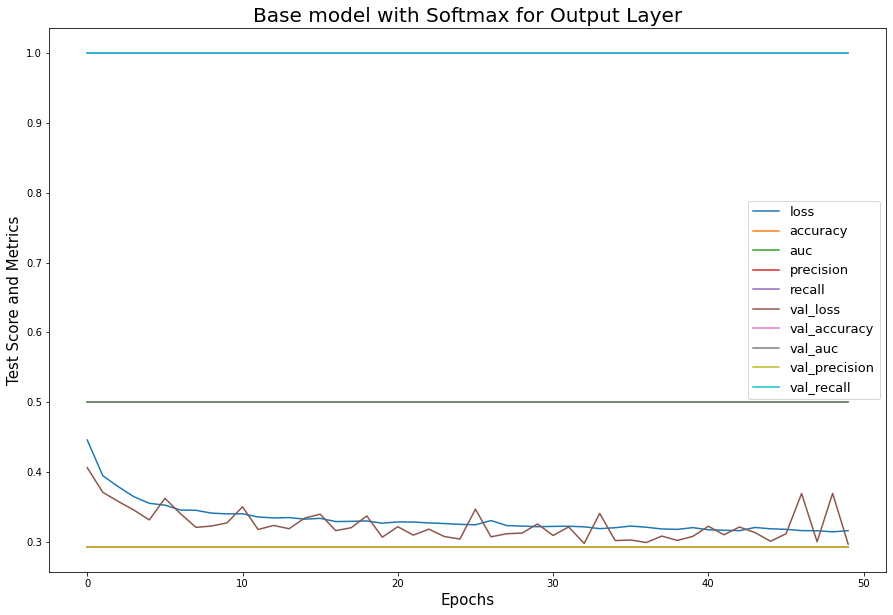

In [149]:
fig, ax = plt.subplots(figsize=(15,10))
[ax.plot(history_fourth.history[i], label=i) for i in history_fourth.history.keys()]
ax.set_xlabel('Epochs', fontsize=15)
ax.set_ylabel('Test Score and Metrics', fontsize=15)
ax.set_title('Base model with Softmax for Output Layer', fontsize=20)
plt.legend(fontsize=13, loc='best')
plt.savefig('base_model_softmax.jpg')

In [152]:
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(50, 50, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
                          # this is necessary before going into conventional dense layer
    
    model.add(Dense(64)) # now start a conventional neural network
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    
    model.add(Dense(1))  #should be equal to the number of classes
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=['accuracy', 'AUC', 'Precision', 'Recall'])
    
    return model

sgd_model = build_model()

batch_size = 32

earlystp_sgd = EarlyStopping(monitor='loss', patience=3)
filepath = 'sgd_model.h5'
checkpoint_sgd = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list_sgd = [checkpoint_sgd]

history_sgd = sgd_model.fit(
    train_generator,
    validation_data=validation_generator,
    batch_size=batch_size, epochs=30,
    callbacks=callbacks_list_sgd)

Epoch 1/30
3993/3993 [==============================] - 990s 248ms/step - loss: 0.5232 - accuracy: 0.7452 - auc: 0.7437 - precision: 0.5724 - recall: 0.2755 - val_loss: 0.4134 - val_accuracy: 0.8229 - val_auc: 0.8699 - val_precision: 0.7003 - val_recall: 0.6906

Epoch 00001: loss improved from inf to 0.48743, saving model to sgd_model.h5
Epoch 2/30
3993/3993 [==============================] - 1046s 262ms/step - loss: 0.4320 - accuracy: 0.8069 - auc: 0.8440 - precision: 0.6909 - recall: 0.6143 - val_loss: 0.3970 - val_accuracy: 0.8285 - val_auc: 0.8837 - val_precision: 0.7782 - val_recall: 0.5796

Epoch 00002: loss improved from 0.48743 to 0.42214, saving model to sgd_model.h5
Epoch 3/30
3993/3993 [==============================] - 1159s 290ms/step - loss: 0.4068 - accuracy: 0.8190 - auc: 0.8646 - precision: 0.7098 - recall: 0.6426 - val_loss: 0.3683 - val_accuracy: 0.8411 - val_auc: 0.8961 - val_precision: 0.7414 - val_recall: 0.7021

Epoch 00003: loss improved from 0.42214 to 0.40068,

KeyboardInterrupt: 

This SGD model is about 5 times slower than the adam model, and the results from initial several epochs is worse than adam, so I simply killed the training. Will go with adam.

In [ ]:
score = sgd_model.evaluate(validation_generator, verbose=0)
print('Test score:', score[0])
print('Test accuracy: ', score[1])
print('Test AUC: ', score[2])
print('Test Precision: ', score[3])
print('Test Recall: ', score[4])

In [ ]:
sgd_model.summary()
sgd_model.save('sgd_model_complete')

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
[ax.plot(history_sgd.history[i], label=i) for i in history_sgd.history.keys()]
ax.set_xlabel('Epochs', fontsize=15)
ax.set_ylabel('Test Score and Metrics', fontsize=15)
ax.set_title('Base model with SGD Optimizer', fontsize=20)
plt.legend(fontsize=13, loc='best')
plt.savefig('sgd.jpg')

In [159]:
def build_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), input_shape=(50, 50, 3)))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Conv2D(64, (3, 3)))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Conv2D(64, (3, 3)))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))


    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
                          # this is necessary before going into conventional dense layer
    
    model.add(Dense(64)) # now start a conventional neural network
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    
    model.add(Dense(1))  #should be equal to the number of classes
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy', 'AUC', 'Precision', 'Recall'])
    
    return model

more_model = build_model()





In [160]:
more_model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_142 (Conv2D)          (None, 48, 48, 64)        1792      
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 46, 46, 64)        36928     
_________________________________________________________________
activation_159 (Activation)  (None, 46, 46, 64)        0         
_________________________________________________________________
max_pooling2d_117 (MaxPoolin (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 21, 21, 64)        36928     
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 19, 19, 64)        36928     
_________________________________________________________________
activation_160 (Activation)  (None, 19, 19, 64)      

In [161]:
earlystp_more = EarlyStopping(monitor='loss', patience=5)
filepath = 'model/more_model.h5'
checkpoint_more = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list_more = [checkpoint_more]

history_more = more_model.fit(
    train_generator,
    validation_data=validation_generator,
    batch_size=batch_size, epochs=30,
    callbacks=callbacks_list_more)

Epoch 1/30
 273/3993 [=>............................] - ETA: 22:59 - loss: 0.5900 - accuracy: 0.7083 - auc: 0.6151 - precision: 0.3725 - recall: 0.0438

KeyboardInterrupt: 

Adding three more layers will takes too long times to train. Will try tonight.

Now I will do Batch Normalization:

In [ ]:
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(50, 50, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))
    
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
                          # this is necessary before going into conventional dense layer
    
    model.add(Dense(64)) # now start a conventional neural network
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    
    model.add(Dense(1))  #should be equal to the number of classes
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=['accuracy', 'AUC', 'Precision', 'Recall'])
    
    return model

batch_norm_model = build_model()

batch_size = 32

earlystp_batch_norm = EarlyStopping(monitor='loss', patience=3)
filepath = 'model/batch_norm_model.h5'
checkpoint_batch_norm = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list_batch_norm = [checkpoint_batch_norm]

history_batch_norm = batch_norm_model.fit(
    train_generator,
    validation_data=validation_generator,
    batch_size=batch_size, epochs=30,
    callbacks=callbacks_list_batch_norm)

Epoch 1/30
3993/3993 [==============================] - 1064s 265ms/step - loss: 0.4373 - accuracy: 0.8063 - auc: 0.8455 - precision: 0.6821 - recall: 0.6303 - val_loss: 0.8572 - val_accuracy: 0.7364 - val_auc: 0.8353 - val_precision: 0.7864 - val_recall: 0.1370

Epoch 00001: loss improved from inf to 0.40769, saving model to model/batch_norm_model.h5
Epoch 2/30
3993/3993 [==============================] - 901s 226ms/step - loss: 0.3735 - accuracy: 0.8398 - auc: 0.8891 - precision: 0.7517 - recall: 0.6806 - val_loss: 0.4663 - val_accuracy: 0.8312 - val_auc: 0.8666 - val_precision: 0.7558 - val_recall: 0.6254

Epoch 00002: loss improved from 0.40769 to 0.37149, saving model to model/batch_norm_model.h5
Epoch 3/30
3993/3993 [==============================] - 881s 221ms/step - loss: 0.3580 - accuracy: 0.8470 - auc: 0.8982 - precision: 0.7550 - recall: 0.7010 - val_loss: 0.3879 - val_accuracy: 0.8452 - val_auc: 0.9052 - val_precision: 0.7895 - val_recall: 0.6424

Epoch 00003: loss improved

In [ ]:
score = batch_norm_model.evaluate(validation_generator, verbose=0)
print('Test score:', score[0])
print('Test accuracy: ', score[1])
print('Test AUC: ', score[2])
print('Test Precision: ', score[3])
print('Test Recall: ', score[4])

In [ ]:
batch_norm_model.summary()
batch_norm_model.save('model/batch_norm_model_complete')

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
[ax.plot(history_sgd.history[i], label=i) for i in history_sgd.history.keys()]
ax.set_xlabel('Epochs', fontsize=15)
ax.set_ylabel('Test Score and Metrics', fontsize=15)
ax.set_title('Base model with Batch Normalization', fontsize=20)
plt.legend(fontsize=13, loc='best')
plt.savefig('images/batch_norm.jpg')

In [ ]:
def build_model():

    l2 = keras.regularizers.l2(0.01)
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(50, 50, 3)))
    model.add(Activation('relu'), kernel_regularizer=l2)
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))
    
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'), kernel_regularizer=l2)
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'), kernel_regularizer=l2)
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
                          # this is necessary before going into conventional dense layer
    
    model.add(Dense(64)) # now start a conventional neural network
    model.add(Activation('relu'), kernel_regularizer=l2)
    model.add(Dropout(0.1))
    
    model.add(Dense(1))  #should be equal to the number of classes
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=['accuracy', 'AUC', 'Precision', 'Recall'])
    
    return model

l2_model = build_model()

batch_size = 32

earlystp_l2 = EarlyStopping(monitor='loss', patience=3)
filepath = 'model/l2_model.h5'
checkpoint_l2 = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list_l2 = [checkpoint_l2]

history_l2 = batch_l2.fit(
    train_generator,
    validation_data=validation_generator,
    batch_size=batch_size, epochs=30,
    callbacks=callbacks_list_l2)

In [ ]:
score = l2_model.evaluate(validation_generator, verbose=0)
print('Test score:', score[0])
print('Test accuracy: ', score[1])
print('Test AUC: ', score[2])
print('Test Precision: ', score[3])
print('Test Recall: ', score[4])

In [ ]:
l2_model.summary()
l2_model.save('model/batch_norm_model_complete')

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
[ax.plot(history_sgd.history[i], label=i) for i in history_sgd.history.keys()]
ax.set_xlabel('Epochs', fontsize=15)
ax.set_ylabel('Test Score and Metrics', fontsize=15)
ax.set_title('Base model with Batch Normalization', fontsize=20)
plt.legend(fontsize=13, loc='best')
plt.savefig('images/batch_norm.jpg')

In [156]:
test_model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_130 (Conv2D)          (None, 48, 48, 64)        1792      
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 46, 46, 64)        36928     
_________________________________________________________________
activation_149 (Activation)  (None, 46, 46, 64)        0         
_________________________________________________________________
max_pooling2d_111 (MaxPoolin (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 21, 21, 64)        36928     
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 19, 19, 64)        36928     
_________________________________________________________________
activation_150 (Activation)  (None, 19, 19, 64)      

In [126]:
earlystp_test = EarlyStopping(monitor='loss', patience=3)
filepath = 'test_model.h5'
checkpoint_test = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list_test= [checkpoint_test]

history_test = test_model.fit(
    train_generator,
    validation_data=validation_generator,
    batch_size=batch_size, epochs=30,
    callbacks=callbacks_list_test)

Epoch 1/30


ValueError: in user code:

    /home/jie/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/jie/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/jie/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/jie/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/jie/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/jie/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/jie/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:755 train_step
        loss = self.compiled_loss(
    /home/jie/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/jie/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    /home/jie/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/jie/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/jie/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1608 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    /home/jie/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/jie/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4979 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    /home/jie/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/jie/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/nn_impl.py:173 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 2) vs (None, 1))


In [69]:
from keras import backend as K

from keras.optimizers import SGD
from keras.optimizers import Adam

from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

In [87]:
def model(train_generator, validation_generator):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(50, 50, 3)))
    model.add(Activation({{choice(['relu', 'sigmoid'])}}))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation({{choice(['relu', 'sigmoid'])}}))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation({{choice(['relu', 'sigmoid'])}}))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Activation({{choice(['relu', 'sigmoid'])}}))
    model.add(Dropout({choice([0.05, 0.1, 0.2, 0.3])}))
    model.add(Dense(1))
    model.add(Activation({{choice(['relu', 'sigmoid', 'softmax'])}}))

    adam = keras.optimizers.Adam(lr={{choice([10**-3, 10**-2, 10**-1])}})
    rmsprop = keras.optimizers.RMSprop(lr={{choice([10**-3, 10**-2, 10**-1])}})
    sgd = keras.optimizers.SGD(lr={{choice([10**-3, 10**-2, 10**-1])}})
   
    choiceval = {{choice(['adam', 'sgd', 'rmsprop'])}}
    if choiceval == 'adam':
        optim = adam
    elif choiceval == 'rmsprop':
        optim = rmsprop
    else:
        optim = sgd
        
    model.compile(loss='binary_crossentropy',
                optimizer=optim,
                metrics=['accuracy'])

    model.fit(train_generator, epochs=epochs, validation_data=validation_generator)
    score, acc = model.evaluate(generator=validation_generator)
    
    print('Test accuracy:', acc)
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

def data(): 
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=90,
        horizontal_flip=True,
        vertical_flip = True,
        width_shift_range = 0.2,
        height_shift_range = 0.2) 

    train_generator = train_datagen.flow_from_directory(
            'data/train',  # this is the target directory
            target_size=(50, 50),  # all images will be resized to 150x150
            batch_size=batch_size,
            seed=1,
            class_mode='binary')

    validation_datagen = ImageDataGenerator(rescale=1./255)

    validation_generator = validation_datagen.flow_from_directory(
            'data/val',
            target_size=(50, 50),
            batch_size=batch_size,
            seed=1,
            class_mode='binary')

    return train_generator, validation_generator

epochs=20
batch_size=16

train_generator, validation_generator = data()

best_run, best_model = optim.minimize(
    model=model(train_generator, validation_generator), data=data,
                algo=tpe.suggest, max_evals=10, trials=Trials(), notebook_name='cap2')

print('Evaluation of best performing model:')

print(best_model.evaluate(validation_generator))

Found 63876 images belonging to 2 classes.
Found 21293 images belonging to 2 classes.


TypeError: require string label